In [1]:
%matplotlib qt


In [2]:
import yt
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable


jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=22)
plt.rc('legend', fontsize=14)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_27846/744338052.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [3]:
def get_yt_data_2d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                   "depo", "sumy",
                   # "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions
    )
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f]
    return data_dict, time_now

In [6]:
filedir = [
            # '/Users/yao/Desktop/Data/test/',  # test
            # '/Users/yao/Desktop/Data/Gekko_test/test3_1x2_256x256/',  # test
            # '/Users/yao/Desktop/Data/Gekko_test/test1_1x1_256x256/',  # test
            # '/Users/yao/Desktop/Data/Gekko_test/job.154261/', # laser 45 degree
            # '/Users/yao/Desktop/Data/Gekko_test/job.154302/', # laser  0 degree, along z
            # '/Users/yao/Desktop/Data/Gekko_test/job.154332/', # laser 10 degree
            # '/Users/yao/Documents/Data/Gekko_test/job.154424/', # laser 0 degree, double resolution
            # '/Users/yao/Documents/Data/Gekko_test/job.154462/', # refine level improvement
            # '/Users/yao/Documents/Data/Gekko_test/job.154465/', # zmin=0.1
        #    '/Users/yao/Documents/Data/Gekko/Nitrogen_t0/', # N as gas
           '/Users/yao/Desktop/EOS0/', # Te ~ [0.1, 3e3]
           '/Users/yao/Desktop/EOS1/', # Te ~ [0.1, 1e5]

          ] 

filename = 'GEKKO_hdf5_plt_cnt_0009'  # check the mass fraction for the negative energy
# filename = 'lasslab_hdf5_chk_0032'  # check the mass fraction for the negative energy

In [7]:
width  = 3.487 * 1.5
height = width * 1.5 #/ 1.618 * 0.8

xx0 = 2
yy0 = 4

for i in range(10):
    i=i+0
    filename = 'GEKKO_hdf5_plt_cnt_' + str(i).zfill(4)
    data_dict, time_now = get_yt_data_2d(filedir[0]+filename)

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='10%', pad=0.05)

    f1 = ax.imshow(
        np.log10(data_dict['dens'][:,:,0].T),
                 cmap=newcmap,
                 origin='lower',
                 extent=[0,xx0,0,yy0],
                 vmin=-6,vmax=1,
                 aspect='equal',
                 )

    ax.set_xlim(0,xx0)
    ax.set_ylim(0,yy0)
    ax.set_xlabel('r (cm)')
    ax.set_ylabel('z (cm)')
    ax.set_title('Time = {:.1f} ns'.format(time_now))

    fig.colorbar(f1, cax=cax, orientation='vertical')

    fig.set_size_inches(width, height)
    fig.tight_layout()
    plt.savefig(filedir[0] + filename + '_dens.png', dpi=300)
    plt.close()

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='10%', pad=0.05)

    f1 = ax.imshow(
        data_dict['tion'][:,:,0].T/11600,
                cmap=newcmap,
            origin='lower',
            extent=[0,xx0,0,yy0],
               vmin=0,
            #    vmax=200,
            aspect='equal',
            )

    ax.set_xlim(0,xx0)
    ax.set_ylim(0,yy0)
    ax.set_xlabel('r (cm)')
    ax.set_ylabel('z (cm)')
    ax.set_title('Time = {:.1f} ns'.format(time_now))

    fig.colorbar(f1, cax=cax, orientation='vertical')
    fig.set_size_inches(width, height)
    fig.tight_layout()
    plt.savefig(filedir[0] + filename + '_ti.png', dpi=300)
    plt.close()

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='10%', pad=0.05)

    f1 = ax.imshow(
        data_dict['tele'][:,:,0].T/11600,
                cmap=newcmap,
            origin='lower',
            extent=[0,xx0,0,yy0],
               vmin=0,
            #    vmax=200,
            aspect='equal',
            )

    ax.set_xlim(0,xx0)
    ax.set_ylim(0,yy0)
    ax.set_xlabel('r (cm)')
    ax.set_ylabel('z (cm)')
    ax.set_title('Time = {:.1f} ns'.format(time_now))

    fig.colorbar(f1, cax=cax, orientation='vertical')
    fig.set_size_inches(width, height)
    fig.tight_layout()
    plt.savefig(filedir[0] + filename + '_te.png', dpi=300)
    plt.close()

    # fig, ax = plt.subplots()
    # fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes('right', size='10%', pad=0.05)

    # f1 = ax.imshow(
    #     data_dict['vely'][:,:,0].T/1e5,
    #             cmap=newcmap,
    #         origin='lower',
    #         extent=[0,1,0,2],
    #            vmin=0,
    #         #    vmax=200,
    #         aspect='equal',
    #         )

    # ax.set_xlim(0,1)
    # ax.set_ylim(0,2)
    # ax.set_xlabel('r (cm)')
    # ax.set_ylabel('z (cm)')
    # ax.set_title('Time = {:.1f} ns'.format(time_now))

    # fig.colorbar(f1, cax=cax, orientation='vertical')
    # fig.set_size_inches(width, height)
    # fig.tight_layout()
    # plt.savefig(filedir[0] + filename + '_vely.png', dpi=300)
    # plt.close()

    
    # plt.show()

    



yt : [WARNING  ] 2025-05-26 10:33:23,940 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-05-26 10:33:23,960 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-05-26 10:33:23,960 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-05-26 10:33:23,960 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-26 10:33:23,961 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-05-26 10:33:23,961 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2025-05-26 10:33:25,819 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-05-26 10:33:25,835 Parameters: current_time              = 2.000471347246018e-09
yt : [INFO     ] 2025-05-26 10:33:25,835 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-05-26 10:33:25,835 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-26 10:33:25,836 Parameters: domain

2025-05-26 10:33:56.176 Python[21819:3520665] error messaging the mach port for IMKCFRunLoopWakeUpReliable


In [7]:
data_dict0, time_now0 = get_yt_data_2d(filedir[0]+filename)

data_dict1, time_now1 = get_yt_data_2d(filedir[1]+filename)

yt : [WARNING  ] 2025-05-26 10:41:06,144 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-05-26 10:41:06,169 Parameters: current_time              = 1.8000243534622232e-08
yt : [INFO     ] 2025-05-26 10:41:06,169 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-05-26 10:41:06,169 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-26 10:41:06,170 Parameters: domain_right_edge         = [2.         4.         6.28318531]
yt : [INFO     ] 2025-05-26 10:41:06,170 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2025-05-26 10:41:08,640 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-05-26 10:41:08,658 Parameters: current_time              = 1.8000026003540076e-08
yt : [INFO     ] 2025-05-26 10:41:08,659 Parameters: domain_dimensions         = [ 640 1280    1]
yt : [INFO     ] 2025-05-26 10:41:08,659 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-05-26 10:41:08,65

In [20]:
width  = 3.487 * 1.5
height = width * 1.5 #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)

f1 = ax.imshow(
    np.log10(data_dict['dens'][:,:,0].T),
    # data_dict['ye'][:,:,0].T*14,
    # data_dict['tele'][:,:,0].T/11600,
    # data_dict['tion'][:,:,0].T/11600,
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
           extent=[0,1,0,2],
           vmin=-6,vmax=1,
        #    vmin=0,
        #    vmax=100,
           aspect='equal',
          )

# ax.set_xlim(0,1)
# ax.set_ylim(0,2)
ax.set_xlabel('r (cm)')
ax.set_ylabel('z (cm)')
ax.set_title('Time = {:.1f} ns'.format(time_now))

fig.colorbar(f1, cax=cax, orientation='vertical')

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

In [19]:
width  = 3.487 * 1.5
height = width * 1.5 #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)

f1 = ax.imshow(
    (data_dict['depo'][:,:,0].T),
    # data_dict['ye'][:,:,0].T*14,
    # data_dict['tele'][:,:,0].T/11600,
    # data_dict['tion'][:,:,0].T/11600,
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
           extent=[0,40,0,80],
        #    vmin=-6,vmax=1,
        #    vmin=10,
        #    vmax=11,
           aspect='equal',
          )

# ax.set_xlim(0,1)
# ax.set_ylim(0,2)
ax.set_xlabel('r (um)')
ax.set_ylabel('z (um)')
ax.set_title('Time = {:.2f} ns'.format(time_now))

fig.colorbar(f1, cax=cax, orientation='vertical')

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

In [17]:
width  = 3.487 * 1.5
height = width * 1.5 #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)

f1 = ax.imshow(
    (data_dict['depo'][:,:,0].T) * 1.6e-24 / (data_dict['sumy'][:,:,0].T) * 1e-7 / 1e-14,
    # data_dict['ye'][:,:,0].T*14,
    # data_dict['tele'][:,:,0].T/11600,
    # data_dict['tion'][:,:,0].T/11600,
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
           extent=[0,40,0,80],
        #    vmin=-6,vmax=1,
        #    vmin=10,
        #    vmax=11,
           aspect='equal',
          )

# ax.set_xlim(0,1)
# ax.set_ylim(0,2)
ax.set_xlabel('r (um)')
ax.set_ylabel('z (um)')
ax.set_title('Time = {:.2f} ns'.format(time_now))

fig.colorbar(f1, cax=cax, orientation='vertical')

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

In [7]:
fig.savefig('/Users/yao/Desktop/dens_{:.1f}.png'.format(time_now),dpi=600)

In [ ]:
width  = 3.487 * 1.5
height = width * 1.5 #/ 1.618 * 0.8

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.05)

f1 = ax.imshow(
    # data_dict['ye'][:,:,0].T*14,
    # data_dict['tele'][:,:,0].T/11600,
    data_dict['tion'][:,:,0].T/11600,
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
           extent=[0,1,0,2],
        #    vmin=-6,vmax=1,
        #    vmin=0,
        #    vmax=100,
           aspect='equal',
          )

# ax.set_xlim(0,1)
# ax.set_ylim(0,2)
# ax.set_xlabel('r (cm)')
# ax.set_ylabel('z (cm)')
ax.set_title('Time = {:.1f} ns'.format(time_now))

fig.colorbar(f1, cax=cax, orientation='vertical')

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py", line 298, in process
    func(*args, **kwargs)
  File "/opt/homebrew/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2972, in mouse_move
    self.set_message(self._mouse_event_to_message(event))
  File "/opt/homebrew/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 2964, in _mouse_event_to_message
    data_str = a.format_cursor_data(data).rstrip()
  File "/opt/homebrew/lib/python3.9/site-packages/matplotlib/artist.py", line 1357, in format_cursor_data
    delta = abs(neighbors - data).max()
  File "/Users/yao/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py", line 4235, in __sub__
    return subtract(self, other)
  File "/Users/yao/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py", line 1020, in __call__
    result = self.f(da, db, *args, **kwargs)
  File "/opt/homebrew/lib/python3.9/site-packages/unyt/array.py", line 1892, in _

In [11]:
fig.savefig('/Users/yao/Desktop/Ti_{:.1f}.png'.format(time_now),dpi=600)

In [19]:
## Now we do the lineout of the data

width  = 3.487 * 1.5
height = width * 1.618 #* 0.8

fig, axs = plt.subplots(2, 1, sharex=True)

xx = np.linspace(0,4,1280)

axs[0].semilogy(xx, np.flip(data_dict0['tele'][0,:])/11600, '-r', label='Te0', lw=1)
axs[0].semilogy(xx, np.flip(data_dict1['tele'][0,:])/11600, '--r', label='Te1', lw=2)
# axs[0].semilogy(xx, data_dict['tion'][0,:]/11600, '--b', label='Ti', lw=1.5)
axs[0].set_ylabel(r'$T_e$ (eV)', color='r')
axs[0].tick_params(axis='y',which='both', color='r', labelcolor='r')
axs[0].spines['right'].set_color('b')
axs[0].spines['left'].set_color('r')
axs[0].grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
axs[0].set_ylim([1e0, 2e4])
# axs[0].invert_xaxis()

ax2 = axs[0].twinx()
ax2.semilogy(xx, np.flip(data_dict0['tion'][0,:])/11600, '-b', label='Ti0', lw=1)
ax2.semilogy(xx, np.flip(data_dict1['tion'][0,:])/11600, '--b', label='Ti1', lw=2)

ax2.set_ylabel(r'$T_i$ (eV)', color='b')
ax2.tick_params(axis='y',which='both', color='b', labelcolor='b')
ax2.set_ylim([1e0, 2e4])
ax2.set_xlim([0,4])
ax2.set_xlabel('z (cm)')
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('r')
# ax2.set_xticks([0,1])
# ax2.invert_xaxis()

# fig.legend(['Te','Ti', r'$\rho$'], 
#            bbox_to_anchor=(0.87, 0.84),
#            fontsize=12, 
#            fancybox=False, 
#            frameon=False)
axs[0].set_title('Time = {:.1f} ns'.format(time_now0))

axs[1].plot(xx, np.flip(data_dict0['ye'][0,:])*14, '-c', lw=1, label='Zeff0')
axs[1].plot(xx, np.flip(data_dict1['ye'][0,:])*14, '--c', lw=2, label='Zeff1')
axs[1].set_ylabel(r'Zeff', color='c')
axs[1].tick_params(axis='y', which='both', color='c', labelcolor='c')
axs[1].set_ylim([0,7])
# axs[1].set_xlim([0.4,1.2])
axs[1].set_xlabel('z (cm)')
axs[1].grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
# axs[1].invert_xaxis()

ax3 = axs[1].twinx()
ax3.semilogy(xx, np.flip(data_dict0['dens'][0,:]), '-m', lw=1, label='Density0')
ax3.semilogy(xx, np.flip(data_dict1['dens'][0,:]), '--m', lw=2, label='Density1')
ax3.tick_params(axis='y', which='both', color='m', labelcolor='m')
ax3.set_ylabel(r'$\rho$ (g/cm$^3$)', color='m')
ax3.spines['right'].set_color('m')
ax3.spines['left'].set_color('c')
ax3.set_ylim([1e-6, 10])
# ax3.invert_xaxis()

fig.set_size_inches(width, height)
fig.tight_layout()

In [ ]:
fig.savefig('/Users/yao/Desktop/Lineouts_{:.1f}.png'.format(time_now0),dpi=600)

2025-05-27 09:50:33.531 Python[27846:3552518] HIToolbox: received notification of WindowServer event port death.
2025-05-27 09:50:33.531 Python[27846:3552518] port matched the WindowServer port created in BindCGSToRunLoop


In [121]:
fig.savefig('/Users/yao/Desktop/map.pdf',dpi=300)

In [6]:
pressure_in_bar = 1e-3 # 10 mbar
kb = 1.4e-23           # J/K
T0 = 300               # K
pressure_in_Pa  = pressure_in_bar * 1e5
number_density  = pressure_in_Pa / (kb * T0)  # m^-3

In [43]:
length = 0.533 - 0.228 # cm
duration = 15. - 5. # ns
speed = length*1e-2 / (duration*1e-9) # m/s
print('speed = {:.2e} m/s'.format(speed))

speed = 3.05e+05 m/s


In [11]:
rho = number_density * mp * 4 # kg/m^3
rho*1e-3 # g/cm^3

1.5912000000000004e-07

In [12]:
rho = number_density * mp * 1 # kg/m^3
rho*1e-3 # g/cm^3

3.978000000000001e-08

In [9]:
## check the laser absorption

# wkdir = '/Users/yao/Desktop/Data/Gekko_test/test1_1x1_256x256/'
# wkdir = '/Users/yao/Desktop/Data/Gekko_test/test2_1x2_128x128/'
# wkdir = '/Users/yao/Desktop/Data/Gekko_test/job.154302/'
# wkdir = '/Users/yao/Desktop/Data/Gekko_test/job.154332/'
# wkdir = ['/Users/yao/Desktop/Data/Gekko_test/job.154302/',
#          '/Users/yao/Desktop/Data/Gekko_test/job.154424/']

wkdir = filedir

file  = 'GEKKO_LaserEnergyProfile.dat'

time_s            = []  # Initialize as an empty list
energy_abs_erg_s  = []  # Initialize as an empty list
energy_in_erg_s   = []  # Initialize as an empty list
energy_out_erg_s  = []  # Initialize as an empty list

for i in range(len(wkdir)):
    data = wkdir[i] + file
    print(data)
    time           = np.loadtxt(data)[:,1]
    energy_in_erg  = np.loadtxt(data)[:,3]
    energy_out_erg = np.loadtxt(data)[:,4]
    
    time_s.append(time)  # Append the result to the list 
    energy_in_erg_s.append(energy_in_erg)  # Append the result to the list
    energy_out_erg_s.append(energy_out_erg)  # Append the result to the list
    energy_abs_erg_s.append(energy_in_erg - energy_out_erg)  # Append the result to the list

# time_s         = np.loadtxt(wkdir+file)[:,1]
# energy_in_erg  = np.loadtxt(wkdir+file)[:,3]
# energy_out_erg = np.loadtxt(wkdir+file)[:,4]

/Users/yao/Desktop/GEKKO_LaserEnergyProfile.dat


In [33]:
energy_abs_erg[1]

array([1.58619000e-09, 1.06136800e-08, 8.06794400e-08, ...,
       7.10736280e+05, 7.10736489e+05, 7.10736522e+05])

In [29]:
time_s[0].size

498

In [10]:
## Now we do the lineout of the data

width  = 3.487 * 1.5
height = width #/ 1.618 #* 0.8

fig, axs = plt.subplots(1, 1, sharex=True)

axs.plot(time_s[0]*1e9, energy_in_erg_s[0]*1e-7, '-r', lw=2, label='Laser Energy In')
axs.plot(time_s[0]*1e9, energy_out_erg_s[0]*1e-7, '--b', lw=2, label='Laser Energy Out')
axs.plot(time_s[0]*1e9, energy_abs_erg_s[0]*1e-7, ':g', lw=2, label='Laser Energy Absorbed')
axs.set_ylabel('Energy (J)')
axs.set_xlabel('Time (ns)')
axs.grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
axs.legend()
# axs.set_yscale('log')
axs.set_xlim([0,time_s[0].max()*1e9])
axs.set_ylim([0,energy_in_erg_s[0].max()*1e-7])
# axs.set_ylim([1e-1,1e4])

fig.set_size_inches(width, height)
fig.tight_layout()

In [11]:
fig.savefig('/Users/yao/Desktop/Energy_budget.png',dpi=600)

In [37]:
energy_abs_erg_s[0].max() / energy_in_erg_s[0].max() * 100

50.45779671489438

In [77]:
# energy_abs_erg_test1 = energy_abs_erg
# energy_abs_erg_test2 = energy_abs_erg
energy_abs_erg_test3 = energy_abs_erg

In [30]:
## Now we do the lineout of the data

width  = 3.487 * 1.5
height = width #/ 1.618 #* 0.8

fig, axs = plt.subplots(1, 1, sharex=True)

axs.plot(time_s[0]*1e9, energy_abs_erg[0]*1e-7, ':g', lw=2, label='Zmin=0.02; refine=4')
# axs.plot(time_s[1]*1e9, energy_abs_erg[1]*1e-7, '--b', lw=2, label='Zmin=0.02; refine=6')
# axs.plot(time_s[2]*1e9, energy_abs_erg[2]*1e-7, '-r', lw=2, label='Zmin=0.1; refine=4')

axs.set_ylabel('Energy Absorption (J)')
axs.set_xlabel('Time (ns)')
axs.grid(which='both', alpha=0.5,linestyle=':', lw=1.0)
axs.legend()
# axs.set_yscale('log')
# axs.set_xlim([0,2])
# axs.set_ylim([0,700])

fig.set_size_inches(width, height)
fig.tight_layout()

In [24]:
fig.savefig('/Users/yao/Desktop/Energy_budget_comp.png',dpi=600)

In [10]:
data = yt.load("/Users/yao/Desktop/Data/Gekko_test/test3_1x2_256x256/lasslab_hdf5_plt_cnt_0001")

yt : [WARNING  ] 2025-03-31 17:03:39,014 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2025-03-31 17:03:39,035 Parameters: current_time              = 1.0000571895717567e-09
yt : [INFO     ] 2025-03-31 17:03:39,036 Parameters: domain_dimensions         = [256 256   1]
yt : [INFO     ] 2025-03-31 17:03:39,036 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-03-31 17:03:39,036 Parameters: domain_right_edge         = [1.         2.         6.28318531]
yt : [INFO     ] 2025-03-31 17:03:39,037 Parameters: cosmological_simulation   = 0


In [11]:
data.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	   256	         65536	            41
  1	   772	        197632	            59
  2	  2700	        691200	            89
----------------------------------------------
   	  3728	        954368


t = 1.00005719e-09 code_time = 1.00005719e-09 s = 3.16899000e-17 yr

Smallest Cell:
	Width: 3.165e-28 Mpc
	Width: 3.165e-22 pc
	Width: 6.528e-17 AU
	Width: 9.766e-04 cm


In [12]:
data.field_list

[('flash', 'dens'),
 ('flash', 'depo'),
 ('flash', 'divb'),
 ('flash', 'pres'),
 ('flash', 'tele'),
 ('flash', 'tion'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'ye')]

In [13]:
p = yt.ProjectionPlot(data, "theta", ('flash', 'depo'))


yt : [INFO     ] 2025-03-31 17:03:47,644 Projection completed
yt : [INFO     ] 2025-03-31 17:03:47,648 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-03-31 17:03:47,648 ylim = 0.000000 2.000000
yt : [INFO     ] 2025-03-31 17:03:47,649 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2025-03-31 17:03:47,650 xlim = 0.000000 1.000000
yt : [INFO     ] 2025-03-31 17:03:47,650 ylim = 0.000000 2.000000
yt : [INFO     ] 2025-03-31 17:03:47,653 Making a fixed resolution buffer of (('flash', 'depo')) 800 by 800



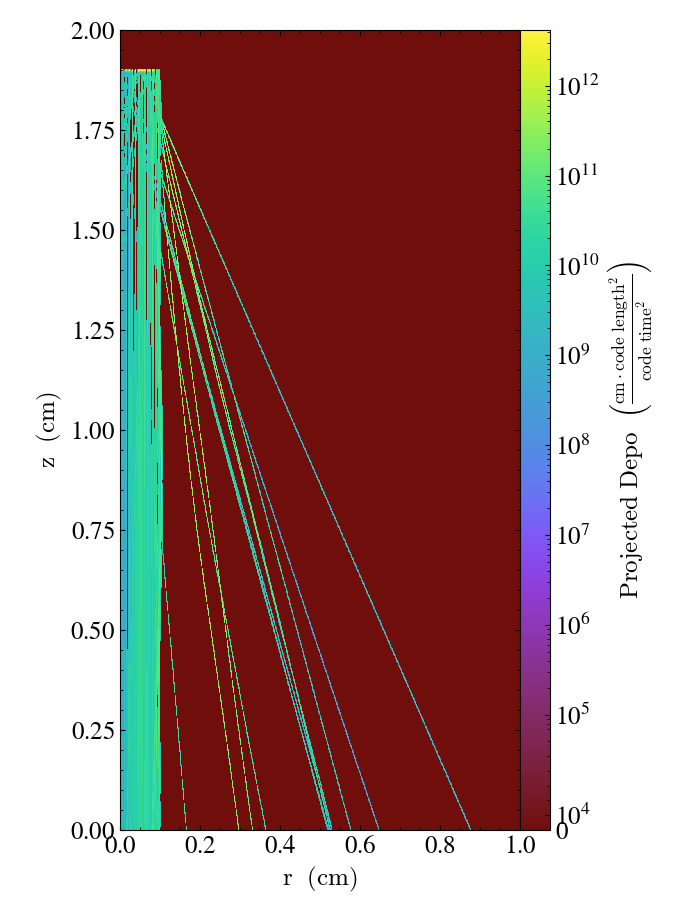

In [14]:
p.show()

In [28]:
data.all_data()['x']

YTFieldNotFound: Could not find field 'x' in lasslab_hdf5_plt_cnt_0001.